# 소상공인시장진흥공단 상가업소정보로 스타벅스, 이디야 위치 분석하기
* https://www.data.go.kr/dataset/15012005/fileData.do
* [[비즈&빅데이터]스타벅스 '쏠림' vs 이디야 '분산'](http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015)

In [0]:
# warning 메시지 제거, warning 메시지는 라이브러리 업데이트나 사용법에 대한 안내 등이 있습니다.
# 코딩을 처음 시작할 때는  warning 메시지가 나오면 당황하실 수도 있어서 제거를 하고 보도록 합니다.
# warning 메시지는 제거하고 보셔도 되지만 Error 메시지를 꼭 고쳐주셔야 합니다.
import warnings
warnings.filterwarnings('ignore')

## 필요한 라이브러리 불러오기

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
# 지도 시각화를 위해
import folium

# 노트북 안에서 그래프를 표시하기 위해
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## Colab 에서 실행을 위한 코드

* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리합니다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러옵니다.

In [7]:
# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [0]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# PyDrive client 인증
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [9]:
# 공유 가능한 링크로 파일 가져오기
url = 'https://drive.google.com/open?id=1xvJs9ZxUHoBBAUXq1IWEaRXgcop8KjrT'
id = url.split('=')[1]
print(id)
downloaded = drive.CreateFile({'id':id}) 
# data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
%mkdir data
downloaded.GetContentFile('data/store_201906_01.csv')  

1xvJs9ZxUHoBBAUXq1IWEaRXgcop8KjrT


## 데이터 불러오기
* 데이터 다운로드 위치 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다.
* 구글드라이브에서 받기 : https://drive.google.com/open?id=1xvJs9ZxUHoBBAUXq1IWEaRXgcop8KjrT

In [10]:
# 데이터를 불러와 df_store 라는 변수에 담아주세요.
df_store = pd.read_csv("data/store_201906_01.csv")
df_store.head()

상가업소번호            상호명         지점명  ...  호정보          경도         위도
0  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점  ...  NaN  127.047883  37.505675
1  19911801           프로포즈         NaN  ...  NaN  126.899220  37.471711
2  19912201       싱싱커피&토스트         NaN  ...   26  128.980455  35.159774
3  19905471         와라와라호프         NaN  ...  NaN  127.061026  37.493922
4  19932756       가락사우나내스낵         NaN  ...  NaN  127.104071  37.500249

[5 rows x 39 columns]

## 데이터 크기 보기

In [11]:
df_store.shape

(565016, 39)

## info 보기

In [12]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565016 entries, 0 to 565015
Data columns (total 39 columns):
상가업소번호       565016 non-null int64
상호명          565015 non-null object
지점명          75524 non-null object
상권업종대분류코드    565016 non-null object
상권업종대분류명     565016 non-null object
상권업종중분류코드    565016 non-null object
상권업종중분류명     565016 non-null object
상권업종소분류코드    565016 non-null object
상권업종소분류명     565016 non-null object
표준산업분류코드     532064 non-null object
표준산업분류명      532064 non-null object
시도코드         565016 non-null int64
시도명          565016 non-null object
시군구코드        565016 non-null int64
시군구명         565016 non-null object
행정동코드        565016 non-null int64
행정동명         565016 non-null object
법정동코드        565016 non-null int64
법정동명         565016 non-null object
지번코드         565016 non-null int64
대지구분코드       565016 non-null int64
대지구분명        565016 non-null object
지번본번지        565016 non-null int64
지번부번지        467893 non-null float64
지번주소         565016 non-null obje

## 결측치 보기

In [13]:
df_store.isnull().sum()

상가업소번호            0
상호명               1
지점명          489492
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      32952
표준산업분류명       32952
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         97123
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        494164
건물관리번호            0
건물명          303808
도로명주소             0
구우편번호             0
신우편번호             9
동정보          514802
층정보          220463
호정보          481880
경도                0
위도                0
dtype: int64

## 사용하지 않는 컬럼 제거하기

In [14]:
drop_columns = ["상권업종중분류코드", "상권업종소분류코드", 
                "건물관리번호", "표준산업분류코드", "표준산업분류명", 
                "지번부번지", "층정보", "건물명", "호정보", 
                "지점명", "건물부번지", "동정보"]
df_store[drop_columns].sample()

상권업종중분류코드 상권업종소분류코드                     건물관리번호  ...  지점명 건물부번지  동정보
556002       F05    F05A01  1129013800102230031012557  ...  NaN   NaN  NaN

[1 rows x 12 columns]

In [15]:
df_store.shape

(565016, 39)

In [16]:
df_store= df_store.drop(drop_columns,axis=1)
df_store.shape

(565016, 27)

## 일부 컬럼만 보기

In [17]:
# 상권업종대분류명 컬럼만 보기
df_store["상권업종대분류명"].head()

0       음식
1       음식
2       음식
3       음식
4    생활서비스
Name: 상권업종대분류명, dtype: object

In [18]:
# 상권업종소분류명 컬럼만 보기
df_store["상권업종소분류명"].head()

0    커피전문점/카페/다방
1          호프/맥주
2          토스트전문
3          호프/맥주
4     사우나/증기탕/온천
Name: 상권업종소분류명, dtype: object

In [19]:
# 상권업종대분류명, 상권업종소분류명 컬럼만 보기
# 2개 이상의 컬럼을 가져 올 때 리스트 형태로 가져온다.
df_store[["상권업종대분류명", "상권업종소분류명"]].head()

상권업종대분류명     상권업종소분류명
0       음식  커피전문점/카페/다방
1       음식        호프/맥주
2       음식        토스트전문
3       음식        호프/맥주
4    생활서비스   사우나/증기탕/온천

In [0]:
# 제거하는 방법도 있지만 사용할 컬럼만 남겨두는 방법도 있습니다.
df_columns = ['상가업소번호', '상호명',  '상권업종대분류명', 
       '상권업종중분류명',  '상권업종소분류명',  
       '시도명', '시군구명', '행정동명', '법정동명', 
       '지번주소', '도로명코드', '도로명주소', 
       '구우편번호', '신우편번호', '경도', '위도']
# 위에 있는 컬럼만 따로 불러옵니다.
df_store = df_store[df_columns].copy()

In [0]:
df_store.shape

## 일부 텍스트가 들어가는 데이터만 가져오기

In [21]:
# 커피라는 텍스트가 들어가는 상권업소중소분류명만 가져옵니다.
# Pandas Series의 str.contains 기능을 사용해 가져올 수 있습니다.
# 가져온 데이터를 coffee 라는 데이터프레임에 담아봅니다.
coffee = df_store[df_store["상권업종소분류명"].str.contains("커피")]
coffee.shape

(23103, 16)

In [22]:
# 상호명으로 봤을 때 커피점의 수 보기
coffee["상호명"].unique()

array(['커피빈코리아선릉로93길점', '스완카페트', '왕실', ..., '놀러오시개', '뉴욕보틀', '블루빈로스터스커피'],
      dtype=object)

In [23]:
# 상호명으로 봤을 때 커피점의 수 보기 --> 유니크 갯수 출력
coffee["상호명"].nunique()

15205

## 특정 상호만 가져오기
* 여기에서는 스타벅스 상호를 가져와서 실습합니다.
* 위에서 커피를 가져왔던 내용을 활용해 봅니다.

In [24]:
# 상호명을 보면 겹치는 문자가 많습니다. 스타벅스의 unique한 상호명만 가져옵니다.
coffee.loc[coffee["상호명"].str.contains("스타벅스"), "상호명"].head()

1219               스타벅스
1946          스타벅스종로3가점
2840               스타벅스
14939    스타벅스커피여의도IFC1F
14951              스타벅스
Name: 상호명, dtype: object

## 시도별 데이터 보기
* 시도와 구군 데이터가 있습니다. 어느 시도의 데이터가 있는지 봅니다.

In [25]:
# 시도에 결측치가 있는지 다시 봅니다.
coffee['시도명'].isnull().sum()

0

In [27]:
# 어떤 시도가 있는지 봅니다.
# 다른 지역을 참고하고 싶다면 같은 폴더에 있는 다른 파일을 참고해 주세요.
# Pandas Series의 value_counts 기능을 사용합니다.
coffee['시도명'].value_counts()

서울특별시    18341
부산광역시     4762
Name: 시도명, dtype: int64

In [28]:
# 시군구명의 unique 값만 봅니다.
coffee['시군구명'].unique()

array(['강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '마포구', '종로구', '도봉구',
       '북구', '남구', '기장군', '광진구', '서대문구', '은평구', '해운대구', '양천구', '용산구',
       '관악구', '성동구', '사상구', '금천구', '송파구', '동대문구', '사하구', '강서구', '금정구',
       '동작구', '중랑구', '강북구', '강동구', '수영구', '연제구', '노원구', '부산진구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

In [29]:
# coffee 데이터프레임에서 "상권업종중분류명" 을 봅니다. 
# Pandas Series의 value_counts 기능을 사용합니다.
coffee['상권업종중분류명'].value_counts()

커피점/카페    23103
Name: 상권업종중분류명, dtype: int64

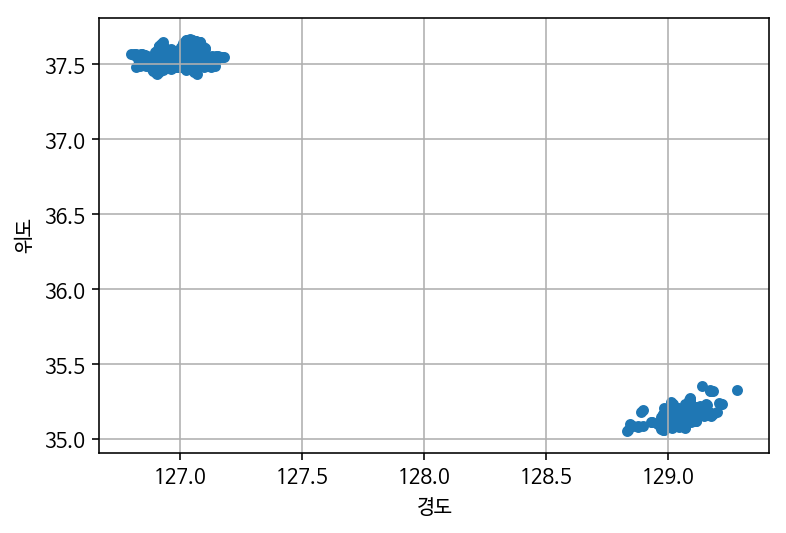

In [30]:
# 경도와 위도가 있습니다. 데이터를 그려봅니다.
# Pandas의 plot.scatter 기능을 활용합니다.
# df_store[:1000]
df_store[:1000].plot.scatter(x="경도", y="위도", grid="True")

## 서울만 따로 보기

In [31]:
df_seoul = df_store.loc[df_store['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(401071, 16)

In [34]:
# 결측치를 확인
df_seoul.isnull().sum()

상가업소번호      0
상호명         0
상권업종대분류명    0
상권업종중분류명    0
상권업종소분류명    0
시도명         0
시군구명        0
행정동명        0
법정동명        0
지번주소        0
도로명코드       0
도로명주소       0
구우편번호       0
신우편번호       2
경도          0
위도          0
dtype: int64

In [35]:
# df_seoul 에서 상권업종대분류명의 value_counts 를 봅니다.
df_seoul['상권업종대분류명'].value_counts()

음식          131687
소매          124782
생활서비스        64344
학문/교육        31247
의료           18826
부동산          15430
관광/여가/오락     11578
숙박            3047
스포츠            130
Name: 상권업종대분류명, dtype: int64

In [36]:
# describe 를 활용해 요약해 봅니다.
# np.object를 사용하면 object 데이터의 요약도 볼 수 있습니다.
df_seoul.describe(include=np.object)


상호명 상권업종대분류명  ...                  지번주소             도로명주소
count   401071   401071  ...                401071            401071
unique  274470        9  ...                127572            127287
top      점프셈교실       음식  ...  서울특별시 종로구 종로6가 262-1  서울특별시 종로구 종로 266
freq      1743   131687  ...                   978               997

[4 rows x 10 columns]

In [37]:
# include=np.number 로 수치 데이터만 요약합니다.
# 여기에서는 위도와 경도만 불러와서 봅니다.
df_seoul[['위도', '경도']].describe(include=np.number)

위도             경도
count  401071.000000  401071.000000
mean       37.544965     126.996983
std         0.048108       0.080574
min        37.434081     126.768169
25%        37.505431     126.928061
50%        37.541162     127.012732
75%        37.571921     127.057331
max        37.692398     127.182588

### 분류별 countplot 그리기

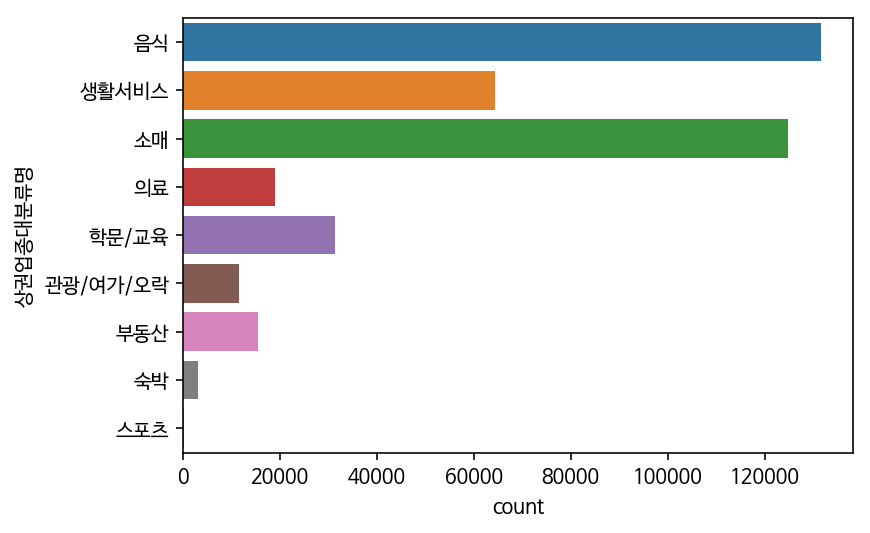

In [39]:
# seaborn 의 sns.countplot을 활용해서 상권업종대분류명 의 수량을 세어 막대그래프를 그려봅니다.

sns.countplot(data=df_seoul, y="상권업종대분류명")

In [40]:
# 아래의 코드를 활용해서 음식이라는 텍스트가 들어간 데이터만 df_food 라는 데이터프레임에 저장합니다.
# df_seoul['상권업종대분류명'].str.contains('음식')

# df_food 라는 데이터프레임을 만들어 주세요.
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(131687, 16)

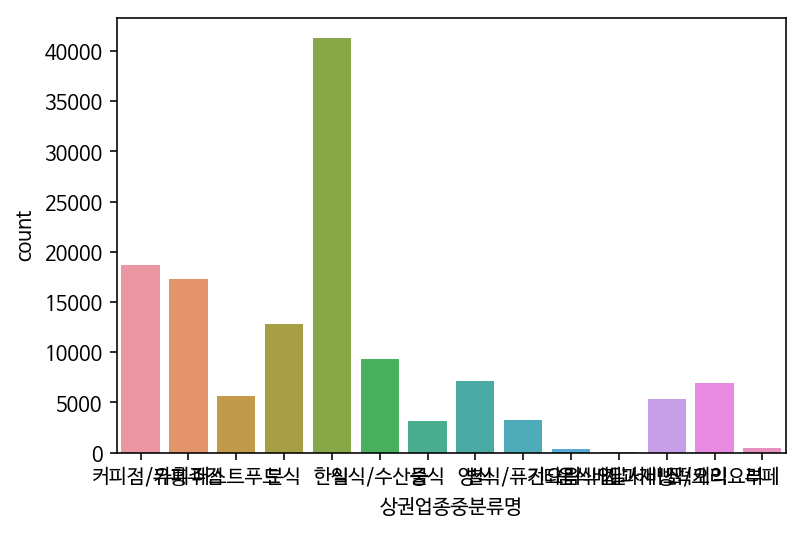

In [41]:
# countplot 을 그리면 해당 카테코리에 해당되는 데이터의 수를 카운트해서 시각화 합니다.
# 상권업종중분류명 으로 countplot을 그려주세요.

sns.countplot(data=df_food, x="상권업종중분류명")

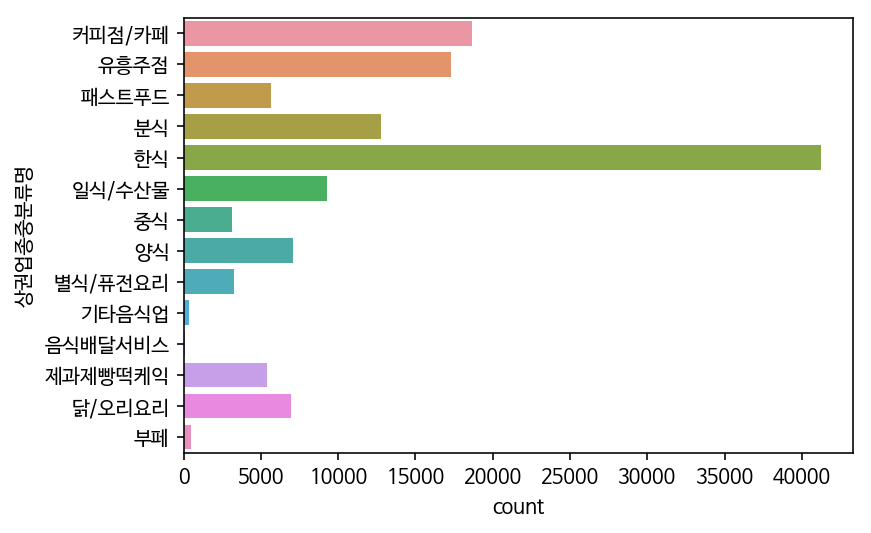

In [42]:
# x, y축을 바꿔서 그리게 되면 위에서 글씨가 겹쳐 보이는 것을 보기 좋게 만들 수 있습니다.
# 위 그래프의 x, y축을 바꿔주세요.

sns.countplot(data=df_food, y="상권업종중분류명")

## 특정 업종만 가져오기

In [43]:
# 특정 업종만 가져오고 싶다면
# df_food['상권업종중분류명'] == '패스트푸드' 를 활용해서 df_fast_food 라는 데이터 프레임을 만들어 봅니다.
df_fast_food = df_food.loc[df_food['상권업종중분류명'] == '패스트푸드']
df_fast_food.shape

(5683, 16)

In [44]:
# 해당 데이터에서 특정 컬럼만 가져오고 싶은데 컬럼명이 생각나지 않는다면 컬럼명만 가져와 봅니다.
df_fast_food.columns

Index(['상가업소번호', '상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명',
       '행정동명', '법정동명', '지번주소', '도로명코드', '도로명주소', '구우편번호', '신우편번호', '경도', '위도'],
      dtype='object')

In [45]:
# df_fast_food['상호명'] 의 unique 값만 가져옵니다.

df_fast_food['상호명'].unique()

array(['석봉토스트', '피자마루', '솔로몬피자', ..., '몬스터피자&펍', '피자뽀끼', '피자레볼루션'],
      dtype=object)

## Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

## 스타벅스, 이디야 위치 분석
* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 스타벅스의 영문명은 STARBUCKS, 이디야는 EDIYA 입니다.

In [0]:
# 상호명_소문자라는 새로운 컬럼에 df_seoul['상호명'].str.lower()로 모든 영문자를 소문자로 만들어 저장해 주세요.
df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()

In [0]:
# ediya 라는 상호가 들어가는 데이터만 가져와 주세요. 위에서 만든 상호명_소문자 컬럼을 사용합니다.
# df_seoul['상호명_소문자']
df_seoul[df_seoul['상호명_소문자'].str.contains('ediya')]

In [49]:
# '스타벅스|starbucks'라는 상호가 들어가는 데이터만 가져와 주세요. 위에서 만든 상호명_소문자 컬럼을 사용합니다.
# 참고로 | 연산자는 or를 의미합니다.

# df_seoul['상호명_소문자']
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks|STARBUCKS'), '상호명'].shape

(502,)

In [50]:
# '이디야|ediya'라는 상호가 들어가는 데이터만 가져와 주세요. 위에서 만든 상호명_소문자 컬럼을 사용합니다.
# 참고로 | 연산자는 or를 의미합니다.
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('이디야|ediya|EDIYA'), '상호명'].shape

(501,)

In [51]:
# '스타벅스|starbucks|이디야|ediya 라는 상호가 들어가는 데이터만 가져와 주세요. 
# 위에서 만든 상호명_소문자 컬럼을 사용합니다.
# 결과를 df_cafe에 저장합니다.

# df_seoul['상호명_소문자']
df_cafe = df_seoul[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA')]
df_cafe.shape

(1003, 17)

In [0]:
# 브랜드명 이라는 컬럼을 만듭니다.
# 스타벅스만 가져와서 저장합니다.
# df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks')를 활용합니다.
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '스타벅스'

In [0]:
# ~은 not을 의미합니다. 스타벅스가 아닌 데이터는 이디야로 넣어주어도 되지만
# 아래 코드처럼 결측치를 이디야로 채워줘도 괜찮습니다.
df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '이디야'

In [0]:
df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')

In [57]:
# 혹시라도 상호명에 결측치가 있는지 확인합니다.
# df_cafe['브랜드명'].isnull() 을 활용해서 '상호명' 이라는 컬럼을 가져옵니다.
df_cafe.loc[df_cafe['브랜드명'].isnull(), '상호명'].head()

Series([], Name: 상호명, dtype: object)

In [58]:
# 상호명과 브랜드명이 제대로 변경되었는지 확인합니다.
# 두 가지 컬럼을 가져옵니다.

df_cafe[['상호명','브랜드명']].head()

상호명  브랜드명
1219       스타벅스  스타벅스
1676      이디야커피   이디야
1946  스타벅스종로3가점  스타벅스
2840       스타벅스  스타벅스
2886      이디야커피   이디야

In [59]:
# 브랜드별 수량을 세어봅니다.value_counts()를 활용해 주세요.
df_cafe['브랜드명'].value_counts()

스타벅스    502
이디야     501
Name: 브랜드명, dtype: int64

## scatterplot
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

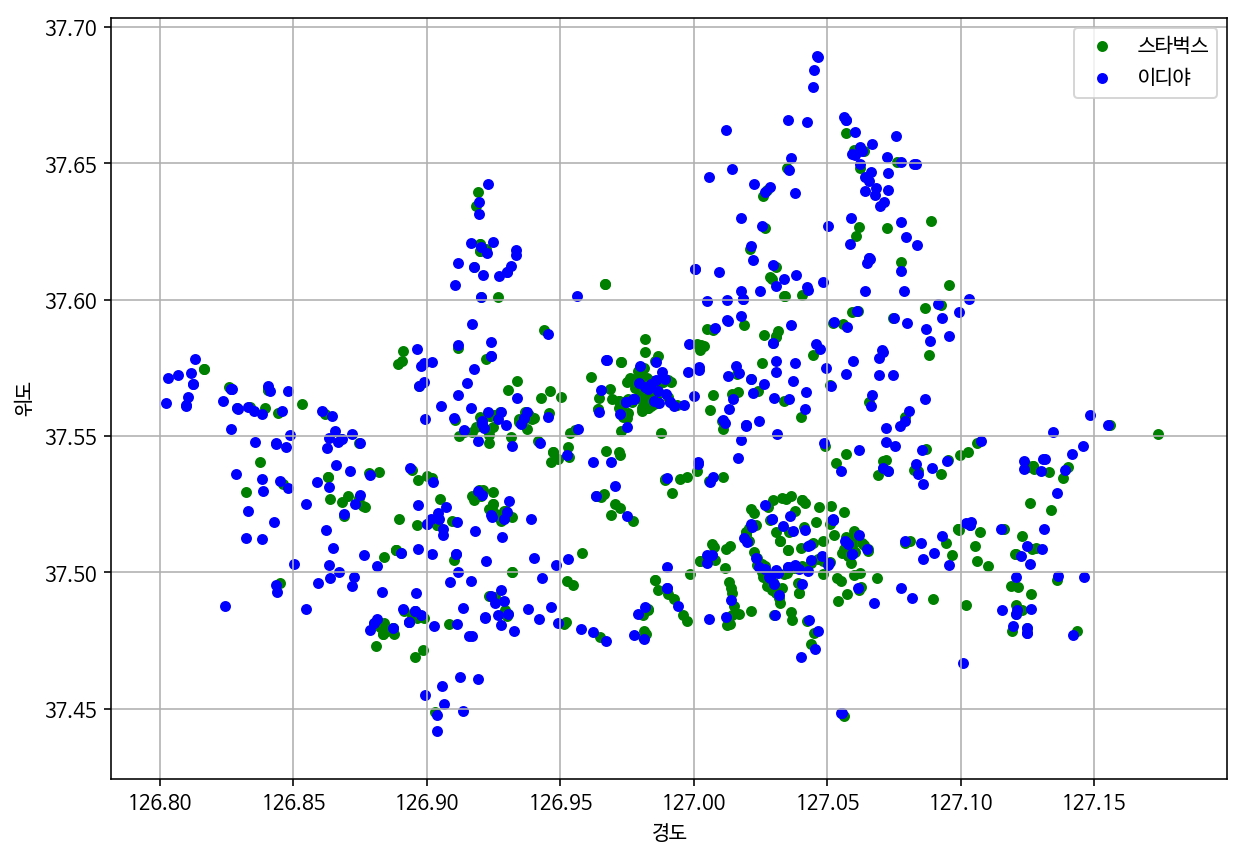

In [60]:
# pandas의 scatterplot 을 그립니다.
# 스타벅스만 그리도록 되어 있는데 해당 코드를 활용해 이디야도 그리도록 합니다.
# ax = df_cafe[df_cafe["브랜드명"] == "스타벅스"].plot.scatter(
#     x="경도", y="위도", color="g", label="스타벅스")
ax = df_cafe[df_cafe["브랜드명"] == "스타벅스"].plot.scatter(
    x="경도", y="위도", color="g", label="스타벅스")
df_cafe[df_cafe["브랜드명"] == "이디야"].plot.scatter(
    x="경도", y="위도", color="b", label="이디야", grid=True, figsize=(10, 7), ax=ax)

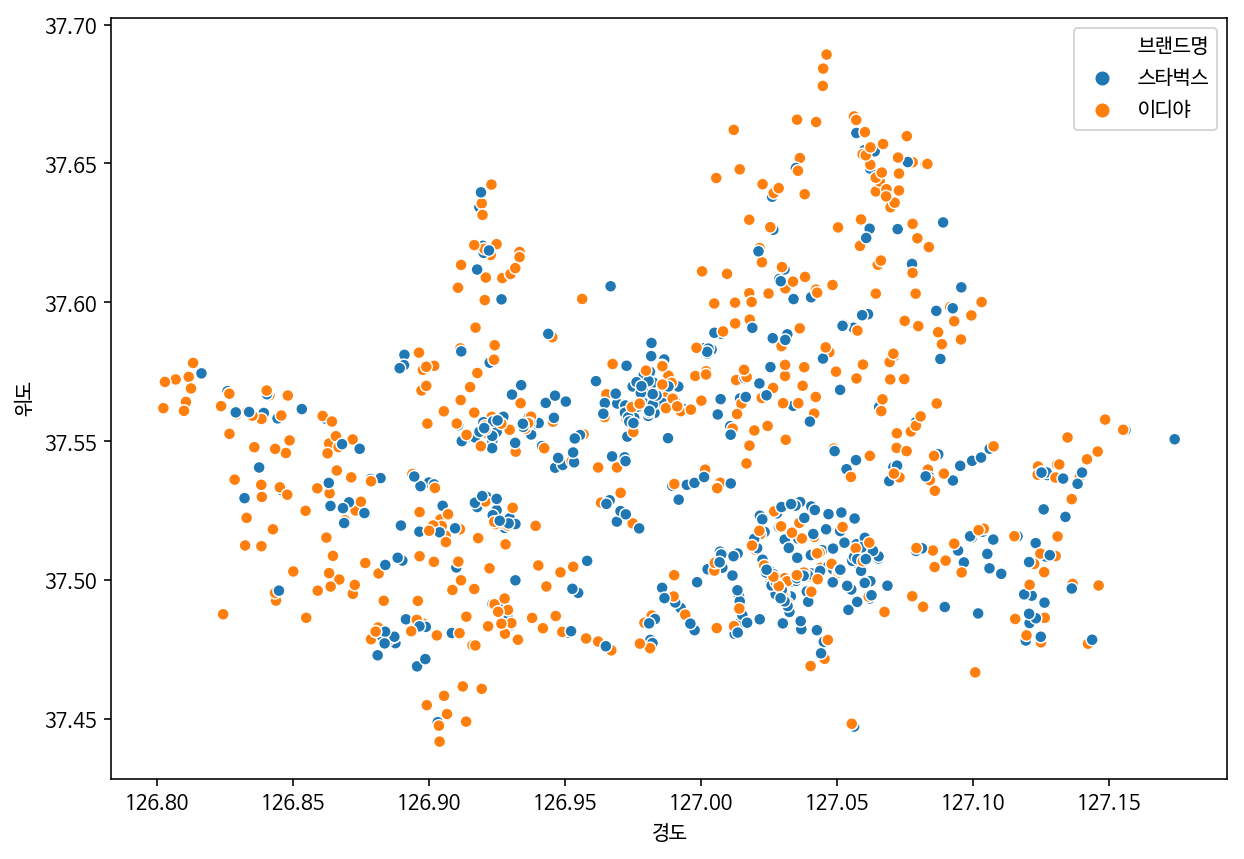

In [61]:
# seaborn 을 통해 그려보세요.
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_cafe, x='경도', y='위도', hue='브랜드명')

In [0]:
geo_df = df_cafe

In [63]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
        
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

## 구별 브랜드별 점포수

In [65]:
df_cafe_brand = pd.DataFrame(
    df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()
).reset_index()
df_cafe_brand.columns = ['구', '브랜드명', '매장수']
df_cafe_brand.head()

구  브랜드명  매장수
0  강남구  스타벅스   84
1  강남구   이디야   44
2  강동구  스타벅스   13
3  강동구   이디야   12
4  강북구  스타벅스    5

## 막대그래프로 시각화 하기

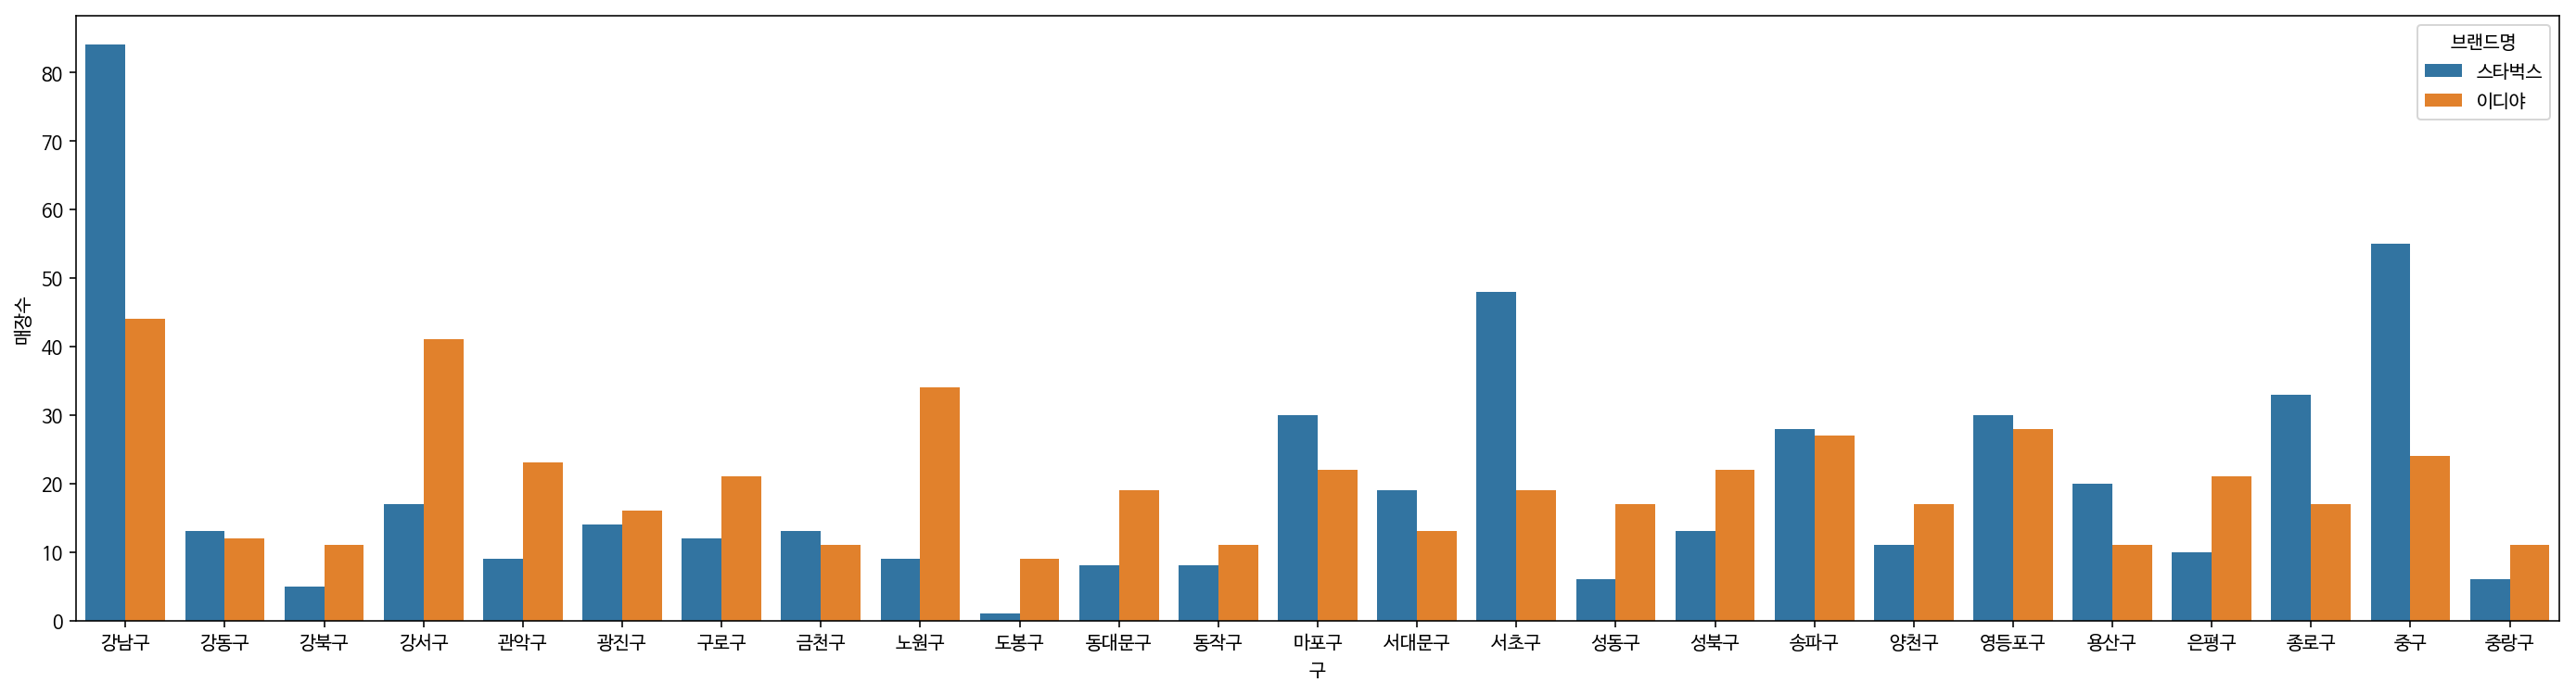

In [66]:
# sns.barplot 을 활용해 df_cafe_brand 데이터 프레임으로 그려봅니다.
#  x='구', y='매장수', hue='브랜드명' 옵션을 사용합니다.

plt.figure(figsize=(24, 6))
sns.barplot(data=df_cafe_brand, x='구', y='매장수', hue='브랜드명')

### Pandas의 groupby 활용하기

In [71]:
df_cafe.groupby(['시군구명'])['상호명'].count()

시군구명
강남구     128
강동구      25
강북구      16
강서구      58
관악구      32
광진구      30
구로구      33
금천구      24
노원구      43
도봉구      10
동대문구     27
동작구      19
마포구      52
서대문구     32
서초구      67
성동구      23
성북구      35
송파구      55
양천구      28
영등포구     58
용산구      31
은평구      31
종로구      50
중구       79
중랑구      17
Name: 상호명, dtype: int64

In [0]:
df_cafe_gu = pd.DataFrame(df_cafe.groupby(['시군구명'])['상호명'].count())
df_cafe_gu.head()

In [72]:
# df_cafe 데이터 프레임으로 시군구명, 브랜드명, 상호명 을 활용해 pivot_table 을 그립니다.
# 기본값이 평균이기 때문에 aggfunc="count" 를 지정합니다.
# 결과는 df_cafe_brand_gu에 저장합니다.
df_cafe_brand_gu = df_cafe.pivot_table(index="시군구명", columns="브랜드명", values="상호명", aggfunc="count")
df_cafe_brand_gu.head()

브랜드명  스타벅스  이디야
시군구명           
강남구     84   44
강동구     13   12
강북구      5   11
강서구     17   41
관악구      9   23

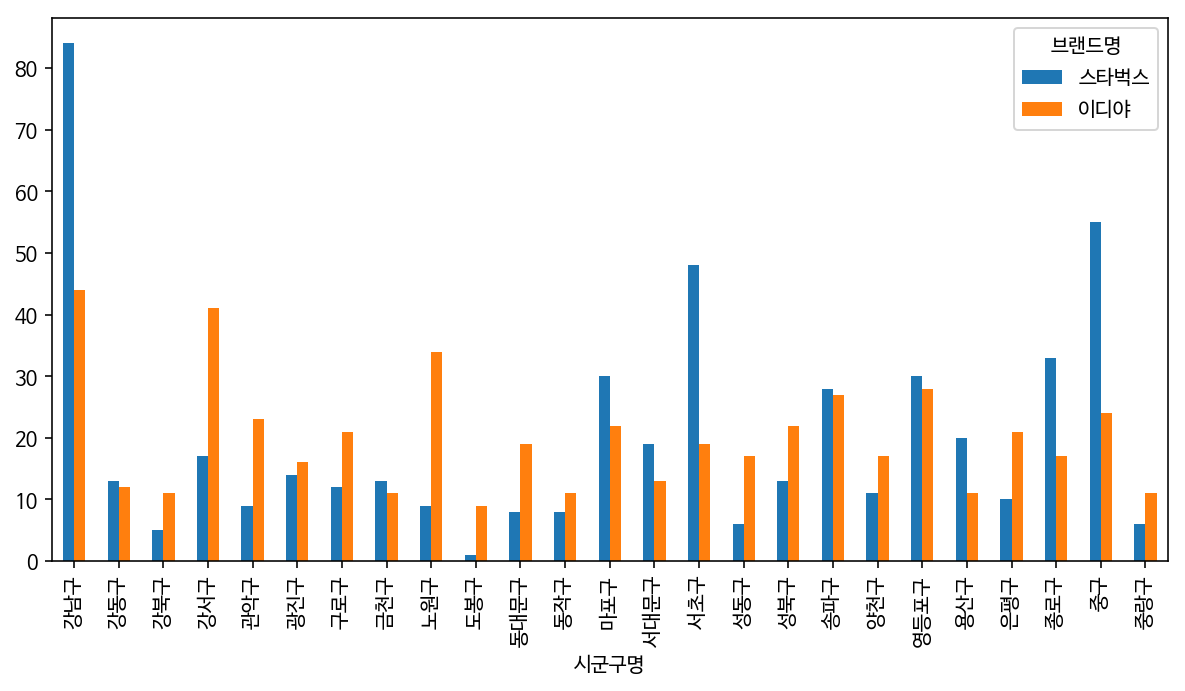

In [73]:
# Pandas 의 plot.bar를 그려봅니다.
df_cafe_brand_gu.plot.bar(figsize=(10, 5))


## choropleth 그리기

* 구별로 매장수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)

In [78]:
# 공유 가능한 링크로 파일 가져오기
url = 'https://drive.google.com/open?id=13j8-_XLdPe0pptsqu8-uyE-0Ym6V2jw5'
id = url.split('=')[1]
print(id)
downloaded = drive.CreateFile({'id':id}) 
# data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
downloaded.GetContentFile('seoul_municipalities_geo_simple.json')  

13j8-_XLdPe0pptsqu8-uyE-0Ym6V2jw5


InvalidConfigError: ignored

In [0]:
import json

geo_path = 'seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

### 스타벅스 이디야 카페 매장 합계 분포

In [83]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11)

map.choropleth(geo_data = geo_json,
               data = df_cafe_gu['상호명'],
               columns = [df_cafe_brand.index, df_cafe_gu['상호명']],
               fill_color = 'Purples',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
    
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다. 
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

### 스타벅스 매장 분포

In [84]:
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '스타벅스']
df_cafe_starbucks = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_starbucks.columns = ['매장수']
df_cafe_starbucks.head()

매장수
시군구명     
강남구    84
강동구    13
강북구     5
강서구    17
관악구     9

In [85]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_starbucks['매장수'],
               columns = [df_cafe_starbucks.index, df_cafe_starbucks['매장수']],
               fill_color = 'YlGn',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'    

            
        # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
        # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

### 이디야 매장 분포

In [86]:
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '이디야']
df_cafe_ediya = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_ediya.columns = ['매장수']
df_cafe_ediya.head()

매장수
시군구명     
강남구    44
강동구    12
강북구    11
강서구    41
관악구    23

In [87]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_ediya['매장수'],
               columns = [df_cafe_ediya.index, df_cafe_ediya['매장수']],
               fill_color = 'PuBu',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '이디야' :
        icon_color = 'blue'    

            
        # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
        # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

## 매장수 크기를 반영해 CircleMaker 그리기
### Pandas 의 reshaping data 활용하기

<img src="https://i.imgur.com/IIhU0nF.png">

* 출처 : https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* reshaping 관련 문서 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [88]:
df_cafe_brand.head()

구  브랜드명  매장수
0  강남구  스타벅스   84
1  강남구   이디야   44
2  강동구  스타벅스   13
3  강동구   이디야   12
4  강북구  스타벅스    5

In [92]:
# 스타벅스 이디야가 컬럼으로 오도록 만듭니다.
df_cafe_brand_vs = df_cafe_brand.pivot_table(index='구',
                                             columns='브랜드명',
                                             values='매장수')
df_cafe_brand_vs.columns = ['스타벅스', '이디야']
df_cafe_brand_vs.head()

스타벅스  이디야
구             
강남구    84   44
강동구    13   12
강북구     5   11
강서구    17   41
관악구     9   23

In [0]:
# 함수를 만듭니다. 
# 스타벅스와 이디야의 매장수를 비교해서 스타벅스가 더 많다면 1을 반환 아니면 0을 반환하도록 합니다.
def store_count(store):
    if store['스타벅스'] > store['이디야'] :
        return 1
    else:
        return 0

In [94]:
df_cafe_brand_vs['매장수비교'] = df_cafe_brand_vs.apply(store_count, axis=1)
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교
구                    
강남구    84   44      1
강동구    13   12      1
강북구     5   11      0
강서구    17   41      0
관악구     9   23      0

In [95]:
# 위와 같이 표현할 수도 있지만 아래와 같이 lambda로 간결하게 표현할 수도 있습니다.
df_cafe_brand_vs['매장수비교'] = df_cafe_brand_vs.apply( \
    lambda x : 1 if x['스타벅스'] > x['이디야'] else 0, axis=1)
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교
구                    
강남구    84   44      1
강동구    13   12      1
강북구     5   11      0
강서구    17   41      0
관악구     9   23      0

## 지도표현을 위해 구별 위경도 평균 구하기

In [0]:
lng_list = []
lat_list = []
for gu in df_cafe_brand_vs.index:
#     lat = 구별 평균을 구합니다.
#     lng = 구별 평균을 구합니다.
    lat_list.append(lat)
    lng_list.append(lng)
    
# df_cafe_brand_vs['위도'] = 리스트에 저장된 값을 넣어줍니다. 
# df_cafe_brand_vs['경도'] = 리스트에 저장된 값을 넣어줍니다.
df_cafe_brand_vs.head()

In [96]:
lng_list = []
lat_list = []
for gu in df_cafe_brand_vs.index:
    lat = df_cafe.loc[df_cafe['시군구명'] == gu, '위도'].mean()
    lng = df_cafe.loc[df_cafe['시군구명'] == gu, '경도'].mean()
    lat_list.append(lat)
    lng_list.append(lng)
    
df_cafe_brand_vs['위도'] = lat_list
df_cafe_brand_vs['경도'] = lng_list
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교         위도          경도
구                                           
강남구    84   44      1  37.506152  127.045159
강동구    13   12      1  37.540512  127.135966
강북구     5   11      0  37.632224  127.022390
강서구    17   41      0  37.556381  126.837973
관악구     9   23      0  37.481693  126.935638

In [97]:
# CircleMarker의 radius 지정시 다음과 같은 타입오류가 나서 float type 으로 변경
# TypeError: Object of type 'int64' is not JSON serializable

df_cafe_brand_vs['스타벅스'] = df_cafe_brand_vs['스타벅스'].astype(float)
df_cafe_brand_vs['이디야'] = df_cafe_brand_vs['이디야'].astype(float)
df_cafe_brand_vs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 5 columns):
스타벅스     25 non-null float64
이디야      25 non-null float64
매장수비교    25 non-null int64
위도       25 non-null float64
경도       25 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.2+ KB


In [98]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_brand_vs['매장수비교'],
               columns = [df_cafe_brand_vs.index, 
                          df_cafe_brand_vs['매장수비교']],
               fill_color = 'BuGn',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for gu in df_cafe_brand_vs.index:
        
    for cafe in ['스타벅스', '이디야']:
        
        cafe_count = df_cafe_brand_vs.loc[gu, cafe]
        msg = f'{gu} {cafe} 매장수 : {cafe_count:.0f}'
        
        icon_color = 'blue'
        if cafe == '스타벅스': 
            icon_color = 'green'
        
        
        # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
        # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location = [df_cafe_brand_vs.loc[gu,'위도'], 
                      df_cafe_brand_vs.loc[gu, '경도']],
            radius = cafe_count,
            color = icon_color,
            popup = msg,
            fill = True,
            fill_color = icon_color
        ).add_to(map)

map

#### 지도 출력 시 색상 참고
* http://colorbrewer2.org/

## folium 공부를 위해 더 읽어보면 좋을 것 
* https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
* https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps
* [PinkWink의 데이터 사이언스 관련 책 - 파이썬으로 데이터 주무르기](https://pinkwink.kr/1070)

## 카토그램 
* [총선⑫ 인구 비례로 본 당선 지도…‘카토그램’으로 살펴본 당선 현황 > 데이터룸 > 정치 > 뉴스 | KBSNEWS](http://news.kbs.co.kr/news/view.do?ncd=3264019)
* [The Housing Value of Every County in the U.S. - Metrocosm](http://metrocosm.com/the-housing-value-of-every-county-in-the-u-s/)